<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Property Habitability Score</h1>
</div>

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- HackerEarth(August 2022)
    
Problem Statement:- Predict the habitability score of the property using dataset about various properties in the USA

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [1]:
# Data manipulation
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

CatBoost version 1.0.6
NumPy version 1.19.2
Pandas version 1.1.3
seaborn version 0.11.0
sklearn version 0.23.2
xgboost version 1.6.1
lightgbm version 3.3.2


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [2]:
train = pd.read_csv ('C:/Users/PC/Pictures/HE/Get_Room_ML_Hackathon/train.csv')
test = pd.read_csv ('C:/Users/PC/Pictures/HE/Get_Room_ML_Hackathon/test.csv')
submission = pd.read_csv ('C:/Users/PC/Pictures/HE/Get_Room_ML_Hackathon/sample_submission.csv')
test1 = test['Property_ID']

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [3]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitabili

In [4]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)


About Train Data:-

  Property_ID Property_Type  Property_Area  Number_of_Windows  \
0      0x21e3     Apartment            106                NaN   
1      0x68d4     Apartment            733                2.0   
2      0x7d81     Apartment            737                4.0   
3      0x7a57     Apartment            900                3.0   
4      0x9409      Bungalow           2238               14.0   

   Number_of_Doors       Furnishing  Frequency_of_Powercuts Power_Backup  \
0                1   Semi_Furnished                     0.0           No   
1                2      Unfurnished                     1.0           No   
2                2  Fully Furnished                     0.0           No   
3                2      Unfurnished                     2.0          Yes   
4                6  Fully Furnished                     0.0           No   

              Water_Supply  Traffic_Density_Score              Crime_Rate  \
0  Once in a day - Morning                   5.89  Slig

In [5]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

      Property_ID       Property_Type  Property_Area  Number_of_Windows  \
39494      0x6e26  Single-family home           1120                3.0   
39495      0xa013           Apartment            445                1.0   
39496      0x9721            Bungalow           3780                6.0   
39497      0x7e25  Single-family home           1266                3.0   
39498      0x8cb4  Single-family home           1229                2.0   

       Number_of_Doors       Furnishing  Frequency_of_Powercuts Power_Backup  \
39494                2              NaN                     0.0           No   
39495                3  Fully Furnished                     1.0           No   
39496                6      Unfurnished                     0.0          Yes   
39497                1   Semi_Furnished                     0.0           No   
39498                4  Fully Furnished                     0.0           No   

                  Water_Supply  Traffic_Density_

In [6]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499,39499,39499.000000,37845.000000,39499.000000,38457,38116.000000,39499,39499,39499.000000,38712,38280,39499.000000,39499.000000,39499.000000
unique,39499,6,NaN,NaN,NaN,3,NaN,3,5,NaN,4,3,NaN,NaN,NaN
top,0x908e,Apartment,NaN,NaN,NaN,Semi_Furnished,NaN,No,All time,NaN,Well below average,Medium,NaN,NaN,NaN
freq,1,14596,NaN,NaN,NaN,20357,NaN,29714,19511,NaN,19472,32996,NaN,NaN,NaN
mean,NaN,NaN,1391.715638,3.923768,2.331375,NaN,0.484678,NaN,NaN,6.354772,NaN,NaN,121.352566,3.735945,73.482297
std,NaN,NaN,1953.287544,2.690992,1.179964,NaN,0.752207,NaN,NaN,1.219681,NaN,NaN,62.384669,0.796843,14.118753
min,NaN,NaN,100.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,7.280000
25%,NaN,NaN,494.000000,2.000000,1.000000,NaN,0.000000,NaN,NaN,5.600000,NaN,NaN,95.000000,3.220000,69.660000
50%,NaN,NaN,932.000000,4.000000,2.000000,NaN,0.000000,NaN,NaN,6.470000,NaN,NaN,113.000000,3.850000,75.760000
75%,NaN,NaN,1770.000000,5.000000,3.000000,NaN,1.000000,NaN,NaN,7.220000,NaN,NaN,140.000000,4.260000,82.260000


In [7]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
count,10500,10500,10500.000000,10055.000000,10500.000000,10243,10134.000000,10500,10500,10500.000000,10288,10170,10500.000000,10500.000000
unique,10500,6,NaN,NaN,NaN,3,NaN,3,5,NaN,4,3,NaN,NaN
top,0x6dae,Apartment,NaN,NaN,NaN,Semi_Furnished,NaN,No,All time,NaN,Well below average,Medium,NaN,NaN
freq,1,3853,NaN,NaN,NaN,5418,NaN,7974,5187,NaN,5189,8826,NaN,NaN
mean,NaN,NaN,1364.333333,3.897563,2.326571,NaN,0.484409,NaN,NaN,6.361525,NaN,NaN,120.532571,3.734125
std,NaN,NaN,1813.702032,2.690162,1.175324,NaN,0.749686,NaN,NaN,1.216237,NaN,NaN,55.635990,0.793325
min,NaN,NaN,100.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,0.020000,NaN,NaN,0.000000,0.020000
25%,NaN,NaN,505.000000,2.000000,1.000000,NaN,0.000000,NaN,NaN,5.620000,NaN,NaN,95.000000,3.230000
50%,NaN,NaN,935.500000,3.000000,2.000000,NaN,0.000000,NaN,NaN,6.470000,NaN,NaN,113.000000,3.850000
75%,NaN,NaN,1758.000000,5.000000,3.000000,NaN,1.000000,NaN,NaN,7.220000,NaN,NaN,140.000000,4.220000


In [8]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
Property_ID,0,0.000000
Property_Type,0,0.000000
Property_Area,0,0.000000
Number_of_Windows,1654,4.187448
Number_of_Doors,0,0.000000
Furnishing,1042,2.638041
Frequency_of_Powercuts,1383,3.501354
Power_Backup,0,0.000000
Water_Supply,0,0.000000
Traffic_Density_Score,0,0.000000


In [9]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
Property_ID,0,0.000000
Property_Type,0,0.000000
Property_Area,0,0.000000
Number_of_Windows,445,4.238095
Number_of_Doors,0,0.000000
Furnishing,257,2.447619
Frequency_of_Powercuts,366,3.485714
Power_Backup,0,0.000000
Water_Supply,0,0.000000
Traffic_Density_Score,0,0.000000


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Handling "Property_Type" Variable
- Handling "Furnishing" Variable
- Handling "Power_Backup" Variable
- Handling "Water_Supply" Variable
- Handling "Crime_Rate" Variable
- Handling "Dust_and_Noise" Variable


#### * Handling of "Property_Type" Variable

In [10]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Property_Type************In TRAIN Data*************************************************")
#train['Property_Type'].value_counts()
train['Property_Type']=train['Property_Type'].map({'Apartment':0, 'Single-family home':1
                                                   , 'Duplex':2, 'Bungalow':3, 'Container Home':4
                                                  , '#R%$G&867':5})
#print(train['Property_Type'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Property_Type************In TRAIN Data*************************************************


#### * Handling of "Furnishing" Variable

In [11]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Furnishing************In TRAIN Data*************************************************")
#train['Furnishing'].value_counts()
train['Furnishing'] = train['Furnishing'].map({'Semi_Furnished':0, 'Unfurnished':1, 'Fully Furnished':2})
#print(train['Furnishing'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Furnishing************In TRAIN Data*************************************************


#### * Handling of "Power_Backup" Variable

In [12]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Power_Backup************In TRAIN Data*************************************************")
#train['Power_Backup'].value_counts()
train['Power_Backup'] = train['Power_Backup'].map({'No':0, 'Yes':1, 'NOT MENTIONED':2})
#print(train['Power_Backup'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Power_Backup************In TRAIN Data*************************************************


#### * Handling of "Water_Supply" Variable

In [13]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Water_Supply************In TRAIN Data*************************************************")
#train['Water_Supply'].value_counts()
train['Water_Supply'] = train['Water_Supply'].map({'All time':0
                                                   , 'Once in a day - Morning':1
                                                   , 'Once in a day - Evening':2
                                                  , 'Once in two days':3
                                                  , 'NOT MENTIONED':4})
#print(train['Water_Supply'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Water_Supply************In TRAIN Data*************************************************


#### * Handling of "Crime_Rate" Variable

In [14]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Crime_Rate************In TRAIN Data*************************************************")
#train['Crime_Rate'].value_counts()
train['Crime_Rate'] = train['Crime_Rate'].map({'Well below average':0
                                                   , 'Slightly below average':1
                                                   , 'Slightly above average':2
                                                  , 'Well above average':3})
#print(train['Crime_Rate'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Crime_Rate************In TRAIN Data*************************************************


#### * Handling of "Dust_and_Noise" Variable

In [15]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Dust_and_Noise************In TRAIN Data*************************************************")
#train['Dust_and_Noise'].value_counts()
train['Dust_and_Noise'] = train['Dust_and_Noise'].map({'Medium':0
                                                   , 'High':1
                                                   , 'Low':2})
#print(train['Dust_and_Noise'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Dust_and_Noise************In TRAIN Data*************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Handling "Property_Type" Variable
- Handling "Furnishing" Variable
- Handling "Power_Backup" Variable
- Handling "Water_Supply" Variable
- Handling "Crime_Rate" Variable
- Handling "Dust_and_Noise" Variable


#### * Handling of "Property_Type" Variable

In [16]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Property_Type************In TEST Data*************************************************")
#test['Property_Type'].value_counts()
test['Property_Type']=test['Property_Type'].map({'Apartment':0, 'Single-family home':1
                                                   , 'Duplex':2, 'Bungalow':3, 'Container Home':4
                                                  , '#R%$G&867':5})
#print(test['Property_Type'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Property_Type************In TEST Data*************************************************


#### * Handling of "Furnishing" Variable

In [17]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Furnishing************In TEST Data*************************************************")
#test['Furnishing'].value_counts()
test['Furnishing'] = test['Furnishing'].map({'Semi_Furnished':0, 'Unfurnished':1, 'Fully Furnished':2})
#print(test['Furnishing'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Furnishing************In TEST Data*************************************************


#### * Handling of "Power_Backup" Variable

In [18]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Power_Backup************In TEST Data*************************************************")
#test['Power_Backup'].value_counts()
test['Power_Backup'] = test['Power_Backup'].map({'No':0, 'Yes':1, 'NOT MENTIONED':2})
#print(test['Power_Backup'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Power_Backup************In TEST Data*************************************************


#### * Handling of "Water_Supply" Variable

In [19]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Water_Supply************In TEST Data*************************************************")
#test['Water_Supply'].value_counts()
test['Water_Supply'] = test['Water_Supply'].map({'All time':0
                                                   , 'Once in a day - Morning':1
                                                   , 'Once in a day - Evening':2
                                                  , 'Once in two days':3
                                                  , 'NOT MENTIONED':4})
#print(test['Water_Supply'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Water_Supply************In TEST Data*************************************************


#### * Handling of "Crime_Rate" Variable

In [20]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Crime_Rate************In TEST Data*************************************************")
#test['Crime_Rate'].value_counts()
test['Crime_Rate'] = test['Crime_Rate'].map({'Well below average':0
                                                   , 'Slightly below average':1
                                                   , 'Slightly above average':2
                                                  , 'Well above average':3})
#print(test['Crime_Rate'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Crime_Rate************In TEST Data*************************************************


#### * Handling of "Dust_and_Noise" Variable

In [21]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Dust_and_Noise************In TEST Data*************************************************")
#test['Dust_and_Noise'].value_counts()
test['Dust_and_Noise'] = test['Dust_and_Noise'].map({'Medium':0
                                                   , 'High':1
                                                   , 'Low':2})
#print(test['Dust_and_Noise'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Dust_and_Noise************In TEST Data*************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


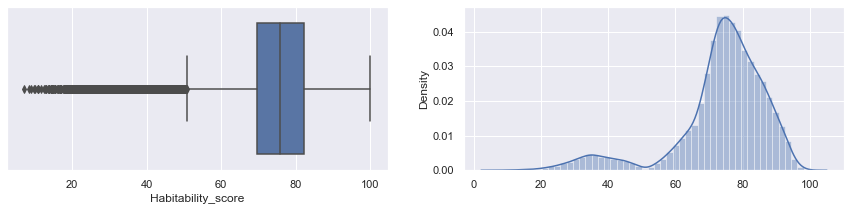

In [22]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Habitability_score', data=train);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train['Habitability_score']);

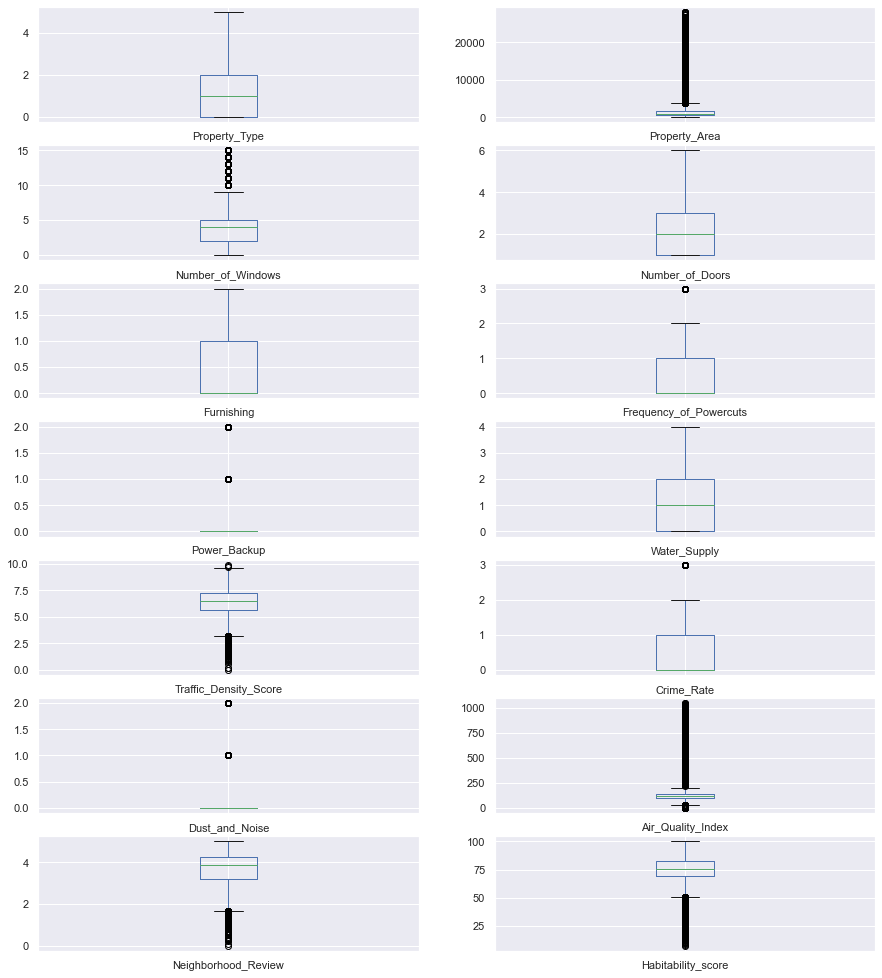

In [23]:
train.plot(kind="box",subplots=True,layout=(10,2),figsize=(15,25));

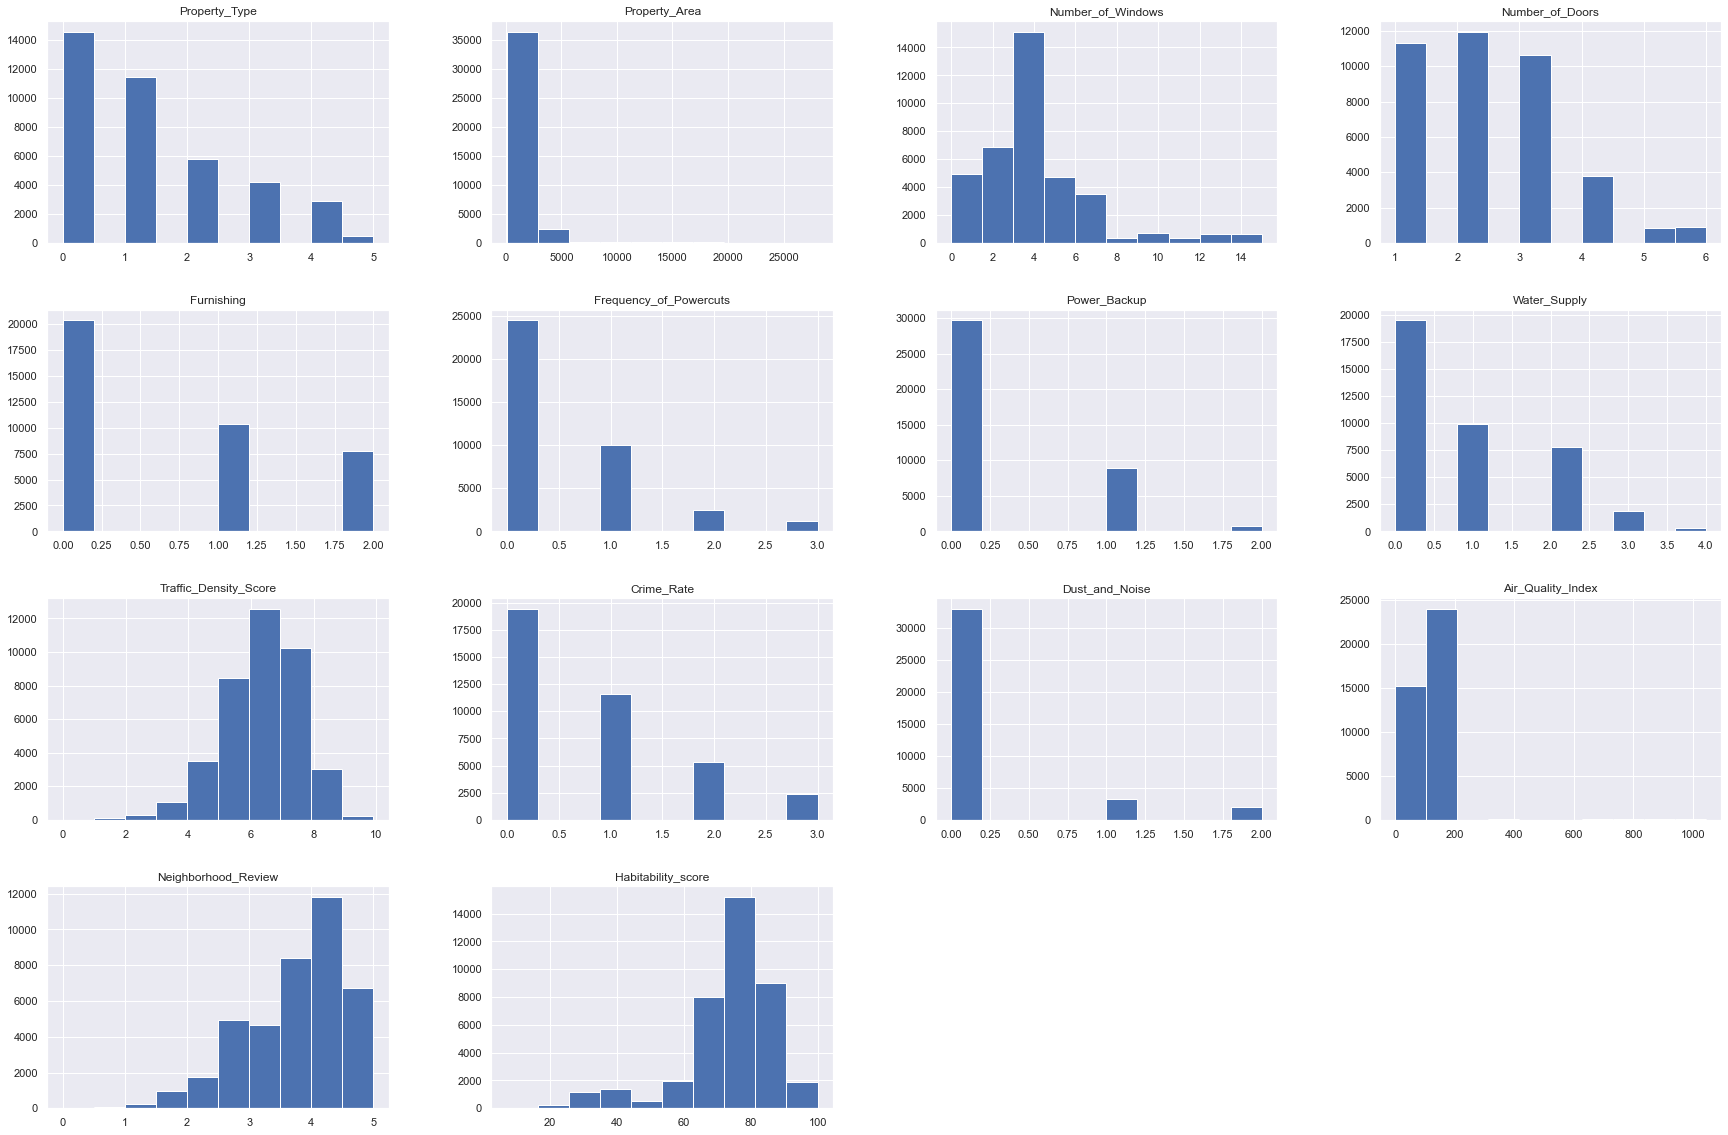

In [24]:
# Histogram to check for Data Distribution
train.hist(figsize=(30,20));

<AxesSubplot:>

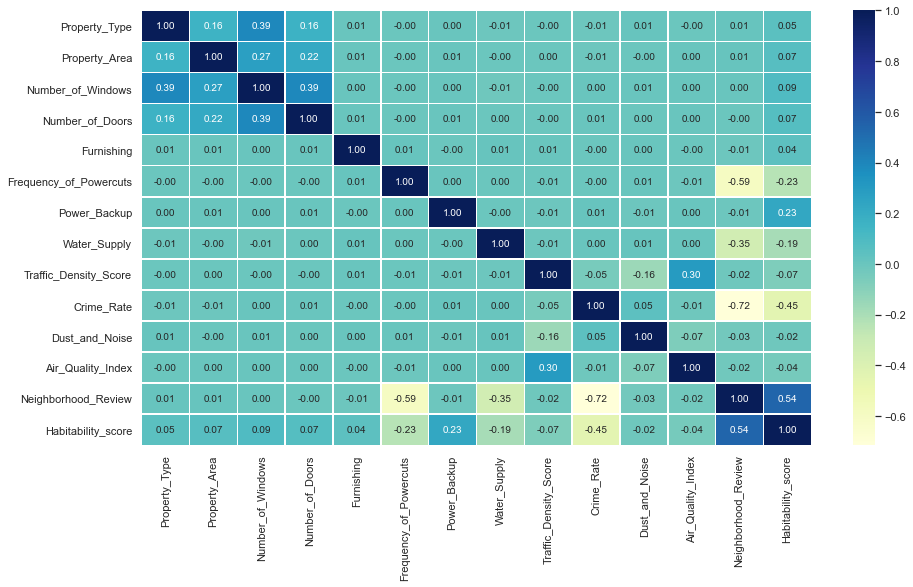

In [25]:
# Check the correlation
fig , ax = plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5)

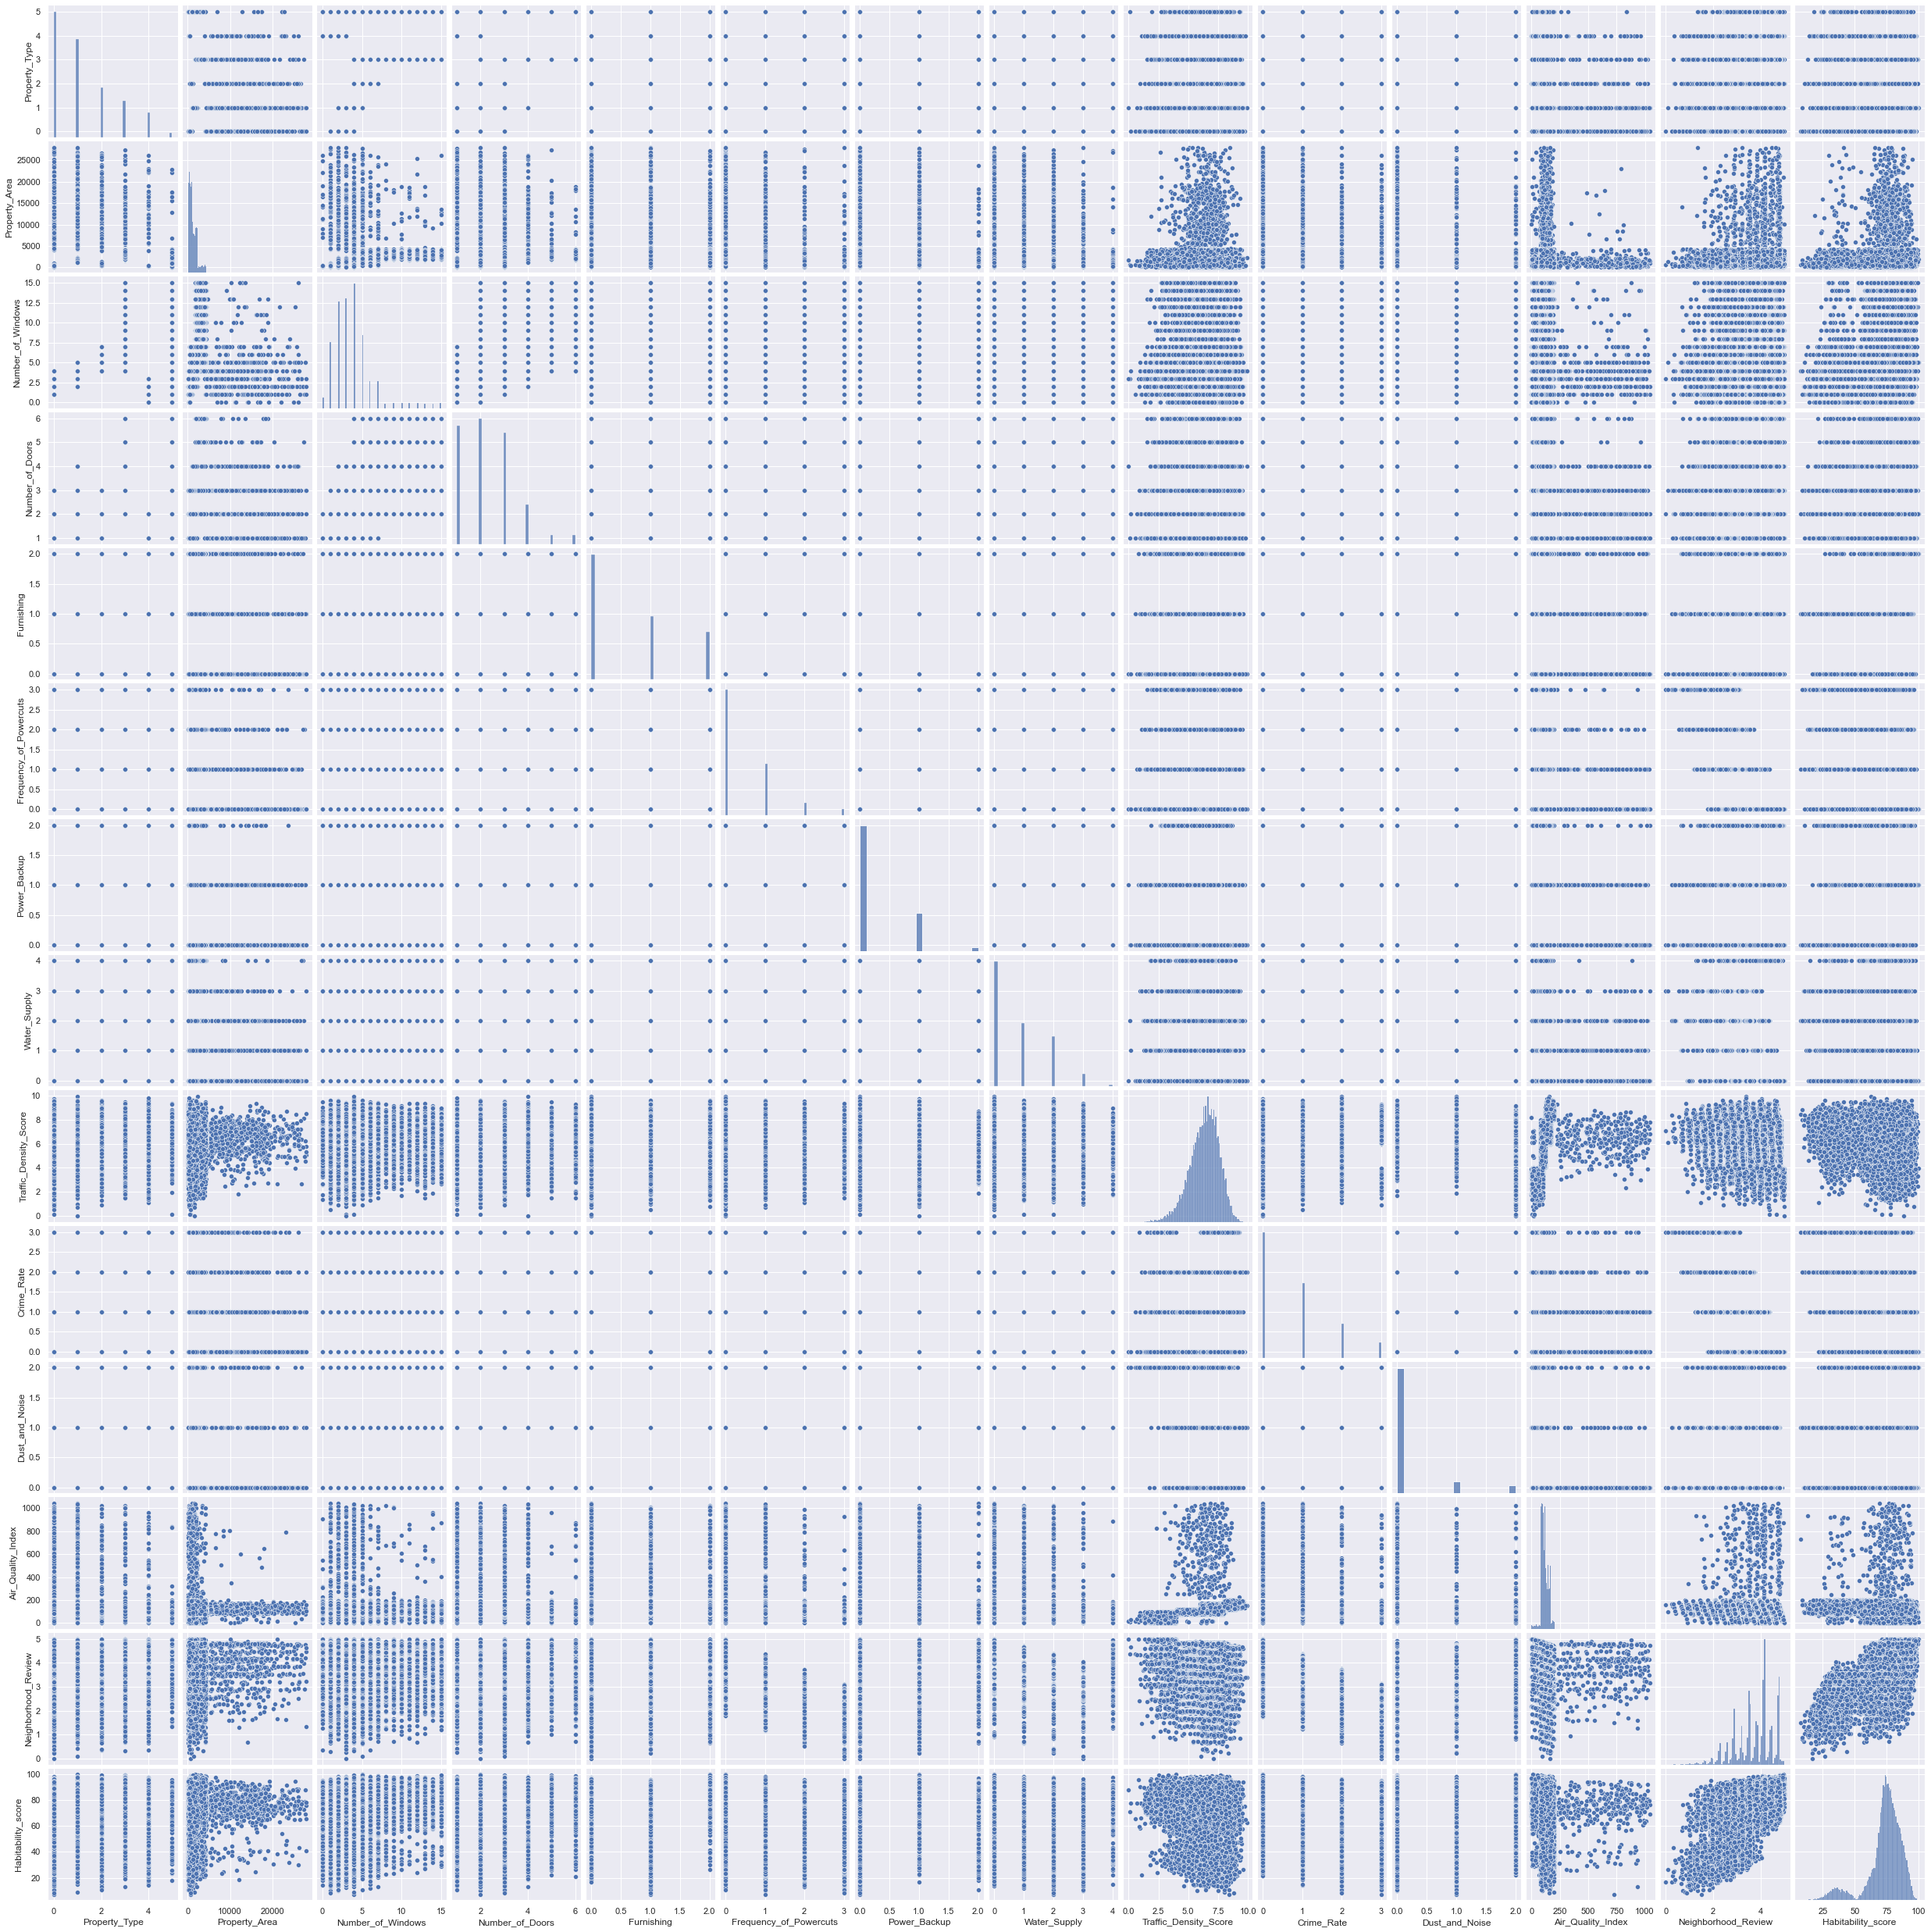

In [29]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [30]:
train.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Train DataSet</h2>
</div>


#### * Imputation of "Number_of_Windows" Variable

In [32]:
print("=========================Imputation of Number_of_Windows=========================================================")
train['Number_of_Windows'] = train['Number_of_Windows'].fillna(train['Number_of_Windows'].mode()[0],axis=0)

=========================Imputation of Number_of_Windows============================================================


#### * Imputation of "Furnishing" Variable

In [33]:
print("=========================Imputation of Furnishing=========================================================")
train['Furnishing'] = train['Furnishing'].fillna(train['Furnishing'].mode()[0],axis=0)

=========================Imputation of Furnishing=========================================================


#### * Imputation of "Frequency_of_Powercuts" Variable

In [34]:
print("=========================Imputation of Frequency_of_Powercuts==================================================")
train['Frequency_of_Powercuts'] = train['Frequency_of_Powercuts'].fillna(train['Frequency_of_Powercuts'].mode()[0],axis=0)

=========================Imputation of Frequency_of_Powercuts==================================================


#### * Imputation of "Crime_Rate" Variable

In [35]:
print("=========================Imputation of Crime_Rate==================================================")
train['Crime_Rate'] = train['Crime_Rate'].fillna(train['Crime_Rate'].mode()[0],axis=0)

=========================Imputation of Crime_Rate==================================================


#### * Imputation of "Dust_and_Noise" Variable

In [36]:
print("=========================Imputation of Dust_and_Noise==================================================")
train['Dust_and_Noise'] = train['Dust_and_Noise'].fillna(train['Dust_and_Noise'].mode()[0],axis=0)

=========================Imputation of Dust_and_Noise==================================================


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [31]:
test.isnull().sum()

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Test DataSet</h2>
</div>


#### * Imputation of "Number_of_Windows" Variable

In [38]:
print("=========================Imputation of Number_of_Windows=========================================================")
test['Number_of_Windows'] = test['Number_of_Windows'].fillna(test['Number_of_Windows'].mode()[0],axis=0)

=========================Imputation of Number_of_Windows=========================================================


#### * Imputation of "Furnishing" Variable

In [39]:
print("=========================Imputation of Furnishing=========================================================")
test['Furnishing'] = test['Furnishing'].fillna(test['Furnishing'].mode()[0],axis=0)

=========================Imputation of Furnishing=========================================================


#### * Imputation of "Frequency_of_Powercuts" Variable

In [40]:
print("=========================Imputation of Frequency_of_Powercuts=====================================================")
test['Frequency_of_Powercuts'] = test['Frequency_of_Powercuts'].fillna(test['Frequency_of_Powercuts'].mode()[0],axis=0)

=========================Imputation of Frequency_of_Powercuts=========================================================


#### * Imputation of "Crime_Rate" Variable

In [41]:
print("=========================Imputation of Crime_Rate=====================================================")
test['Crime_Rate'] = test['Crime_Rate'].fillna(test['Crime_Rate'].mode()[0],axis=0)

=========================Imputation of Crime_Rate=====================================================


#### * Imputation of "Dust_and_Noise" Variable

In [42]:
print("=========================Imputation of Dust_and_Noise=====================================================")
test['Dust_and_Noise'] = test['Dust_and_Noise'].fillna(test['Dust_and_Noise'].mode()[0],axis=0)

=========================Imputation of Dust_and_Noise=====================================================


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [44]:
train = train.drop(['Property_ID'],axis=1)
print('-------------'*9)
test = test.drop(['Property_ID'],axis=1)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           39499 non-null  int64  
 1   Property_Area           39499 non-null  int64  
 2   Number_of_Windows       39499 non-null  float64
 3   Number_of_Doors         39499 non-null  int64  
 4   Furnishing              39499 non-null  float64
 5   Frequency_of_Powercuts  39499 non-null  float64
 6   Power_Backup            39499 non-null  int64  
 7   Water_Supply            39499 non-null  int64  
 8   Traffic_Density_Score   39499 non-null  float64
 9   Crime_Rate              39499 non-null  float64
 10  Dust_and_Noise          39499 non-null  float64
 11  Air_Quality_Index       39499 non-null  float64
 12  Neighborhood_Review     39499 non-null  float64
 13  Habitability_score      39499 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           10500 non-null  int64  
 1   Property_Area           10500 non-null  int64  
 2   Number_of_Windows       10500 non-null  float64
 3   Number_of_Doors         10500 non-null  int64  
 4   Furnishing              10500 non-null  float64
 5   Frequency_of_Powercuts  10500 non-null  float64
 6   Power_Backup            10500 non-null  int64  
 7   Water_Supply            10500 non-null  int64  
 8   Traffic_Density_Score   10500 non-null  float64
 9   Crime_Rate              10500 non-null  float64
 10  Dust_and_Noise          10500 non-null  float64
 11  Air_Quality_Index       10500 non-null  float64
 12  Neighborhood_Review     10500 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 1.0 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing and Model Building</h2>
</div>

- Model wise seperate data preprocessing
- Building ML model to predict 'Habitability_score' of property

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- XGB Regressor</h2>
</div>

In [47]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns)
label='Habitability_score'

# c) Remove "Target" Variable from list of "Features"
features.remove(label)

# d) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features]
y_train=train_temp[label]
X_test=test_temp[features]
y_test=test_temp[label]

model1 = XGBRegressor() 

# e) Fit the model
model1.fit(X_train,y_train) 

# f) Calculate algorithm training fit score
print("Train Data Set Score of XGB Regressor Model is:-",model1.score(X_train,y_train)) 

# g) Calculate algorithm test fit score
print("Test Data Set Score of XGB Regressor Model is:-",model1.score(X_test,y_test)) 

print("----------------------------------------------------------------------------------------------------------------------")


Length of Original Data:- 39499 
Length of Train Data:- 39459 
Length of Test Data:- 40
Train Data Set Score of XGB Regressor Model is:- 0.8580547676902966
Test Data Set Score of XGB Regressor Model is:- 0.8948314416584427
----------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting XGB Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [48]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns)
label='Habitability_score'

# c) Remove "Target" Variable from list of "Features"
features.remove(label)

# d) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features]
y_train=train_temp[label]
X_test=test_temp[features]
y_test=test_temp[label]


model2 = XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=3,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1) 

# e) Fit the model
model2.fit(X_train,y_train) 

# f) Calculate algorithm training fit score
print("Train Data Set Score of XGB Regressor(Hyper Parameter Tune) Model is:-",model2.score(X_train,y_train)) 

# g) Calculate algorithm test fit score
print("Test Data Set Score of XGB Regressor(Hyper Parameter Tune) Model is:-",model2.score(X_test,y_test)) 

print("----------------------------------------------------------------------------------------------------------------------")

Length of Original Data:- 39499 
Length of Train Data:- 39459 
Length of Test Data:- 40
Train Data Set Score of XGB Regressor(Hyper Parameter Tune) Model is:- 0.9035809776071697
Test Data Set Score of XGB Regressor(Hyper Parameter Tune) Model is:- 0.9032198932218999
----------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Random Forest Regressor</h2>
</div>

In [49]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.0001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns)
label='Habitability_score'

# c) Remove "Target" Variable from list of "Features"
features.remove(label)

# d) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features]
y_train=train_temp[label]
X_test=test_temp[features]
y_test=test_temp[label]

model3 = RandomForestRegressor(random_state = 0, max_depth = 18) 

# e) Fit the model
model3.fit(X_train,y_train) 

# f) Calculate algorithm training fit score
print("Train Data Set Score of Random Forest Regressor Model is:-",model3.score(X_train,y_train)) 

# g) Calculate algorithm test fit score
print("Test Data Set Score of Random Forest Regressor Model is:-",model3.score(X_test,y_test)) 

print("----------------------------------------------------------------------------------------------------------------------")


Length of Original Data:- 39499 
Length of Train Data:- 39495 
Length of Test Data:- 4
Train Data Set Score of Random Forest Regressor Model is:- 0.951301192530267
Test Data Set Score of Random Forest Regressor Model is:- 0.7545515193411014
----------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Advanced Version of Random Forest Regressor</h2>
</div>

In [50]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.0001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns)
label='Habitability_score'

# c) Remove "Target" Variable from list of "Features"
features.remove(label)

# d) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features]
y_train=train_temp[label]
X_test=test_temp[features]
y_test=test_temp[label]

model4 =  RandomForestRegressor(random_state = 0, n_estimators = 400) #82.56620

# e) Fit the model
model4.fit(X_train,y_train) 

# f) Calculate algorithm training fit score
print("Train Data Set Score of Advanced Random Forest Regressor Model is:-",model4.score(X_train,y_train)) 

# g) Calculate algorithm test fit score
print("Test Data Set Score of Advanced Random Forest Regressor Model is:-",model4.score(X_test,y_test)) 
print("----------------------------------------------------------------------------------------------------------------------")


Length of Original Data:- 39499 
Length of Train Data:- 39495 
Length of Test Data:- 4
Train Data Set Score of Advanced Random Forest Regressor Model is:- 0.9760085408869783
Test Data Set Score of Advanced Random Forest Regressor Model is:- 0.636599985571567
----------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Cat Boost Regressor</h2>
</div>

In [51]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.0001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns)
label='Habitability_score'

# c) Remove "Target" Variable from list of "Features"
features.remove(label)

# d) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features]
y_train=train_temp[label]
X_test=test_temp[features]
y_test=test_temp[label]

model5 = CatBoostRegressor(random_state=1,depth = 11, iterations = 1000
                          , l2_leaf_reg = 0.2, learning_rate = 0.03) 

# e) Fit the model
model5.fit(X_train,y_train) 

# f) Calculate algorithm training fit score
print("Train Data Set Score of CatBoost Regressor Model is:-",model5.score(X_train,y_train)) 

# g) Calculate algorithm test fit score
print("Test Data Set Score of CatBoost Regressor Model is:-",model5.score(X_test,y_test)) 

print("----------------------------------------------------------------------------------------------------------------------")


Length of Original Data:- 39499 
Length of Train Data:- 39495 
Length of Test Data:- 4
0:	learn: 13.8118941	total: 412ms	remaining: 6m 51s
1:	learn: 13.5089785	total: 499ms	remaining: 4m 8s
2:	learn: 13.2174115	total: 582ms	remaining: 3m 13s
3:	learn: 12.9361706	total: 697ms	remaining: 2m 53s
4:	learn: 12.6706302	total: 812ms	remaining: 2m 41s
5:	learn: 12.4083739	total: 963ms	remaining: 2m 39s
6:	learn: 12.1560588	total: 1.05s	remaining: 2m 28s
7:	learn: 11.9207255	total: 1.14s	remaining: 2m 20s
8:	learn: 11.7095233	total: 1.17s	remaining: 2m 8s
9:	learn: 11.4803896	total: 1.26s	remaining: 2m 4s
10:	learn: 11.2610399	total: 1.34s	remaining: 2m
11:	learn: 11.0486175	total: 1.43s	remaining: 1m 57s
12:	learn: 10.8468908	total: 1.52s	remaining: 1m 55s
13:	learn: 10.6504454	total: 1.6s	remaining: 1m 53s
14:	learn: 10.4650097	total: 1.7s	remaining: 1m 51s
15:	learn: 10.2873809	total: 1.78s	remaining: 1m 49s
16:	learn: 10.1126267	total: 1.88s	remaining: 1m 48s
17:	learn: 9.9453074	total: 1.9

157:	learn: 5.7030753	total: 13.9s	remaining: 1m 14s
158:	learn: 5.7004527	total: 14s	remaining: 1m 14s
159:	learn: 5.6972728	total: 14.1s	remaining: 1m 14s
160:	learn: 5.6922337	total: 14.2s	remaining: 1m 13s
161:	learn: 5.6901430	total: 14.3s	remaining: 1m 13s
162:	learn: 5.6859666	total: 14.4s	remaining: 1m 13s
163:	learn: 5.6829576	total: 14.4s	remaining: 1m 13s
164:	learn: 5.6808928	total: 14.5s	remaining: 1m 13s
165:	learn: 5.6780248	total: 14.6s	remaining: 1m 13s
166:	learn: 5.6726761	total: 14.7s	remaining: 1m 13s
167:	learn: 5.6707426	total: 14.8s	remaining: 1m 13s
168:	learn: 5.6664633	total: 14.9s	remaining: 1m 13s
169:	learn: 5.6643553	total: 14.9s	remaining: 1m 12s
170:	learn: 5.6616034	total: 15s	remaining: 1m 12s
171:	learn: 5.6590547	total: 15.1s	remaining: 1m 12s
172:	learn: 5.6563482	total: 15.2s	remaining: 1m 12s
173:	learn: 5.6540264	total: 15.3s	remaining: 1m 12s
174:	learn: 5.6501856	total: 15.4s	remaining: 1m 12s
175:	learn: 5.6482562	total: 15.4s	remaining: 1m 1

316:	learn: 5.3215402	total: 27.2s	remaining: 58.6s
317:	learn: 5.3204609	total: 27.3s	remaining: 58.5s
318:	learn: 5.3189241	total: 27.3s	remaining: 58.4s
319:	learn: 5.3144696	total: 27.4s	remaining: 58.3s
320:	learn: 5.3126834	total: 27.5s	remaining: 58.2s
321:	learn: 5.3100041	total: 27.6s	remaining: 58.1s
322:	learn: 5.3067919	total: 27.7s	remaining: 58.1s
323:	learn: 5.3045259	total: 27.8s	remaining: 58s
324:	learn: 5.3021335	total: 27.9s	remaining: 57.9s
325:	learn: 5.3002098	total: 27.9s	remaining: 57.8s
326:	learn: 5.2990542	total: 28s	remaining: 57.7s
327:	learn: 5.2953706	total: 28.1s	remaining: 57.6s
328:	learn: 5.2922374	total: 28.2s	remaining: 57.5s
329:	learn: 5.2913211	total: 28.3s	remaining: 57.4s
330:	learn: 5.2902060	total: 28.4s	remaining: 57.4s
331:	learn: 5.2879030	total: 28.5s	remaining: 57.3s
332:	learn: 5.2858819	total: 28.5s	remaining: 57.2s
333:	learn: 5.2825833	total: 28.6s	remaining: 57.1s
334:	learn: 5.2793695	total: 28.7s	remaining: 57s
335:	learn: 5.2774

476:	learn: 4.9988210	total: 41s	remaining: 44.9s
477:	learn: 4.9971425	total: 41s	remaining: 44.8s
478:	learn: 4.9952436	total: 41.1s	remaining: 44.7s
479:	learn: 4.9944374	total: 41.2s	remaining: 44.7s
480:	learn: 4.9930933	total: 41.3s	remaining: 44.6s
481:	learn: 4.9900357	total: 41.4s	remaining: 44.5s
482:	learn: 4.9888803	total: 41.5s	remaining: 44.4s
483:	learn: 4.9863406	total: 41.6s	remaining: 44.3s
484:	learn: 4.9847052	total: 41.7s	remaining: 44.2s
485:	learn: 4.9817690	total: 41.7s	remaining: 44.2s
486:	learn: 4.9782001	total: 41.8s	remaining: 44.1s
487:	learn: 4.9753326	total: 41.9s	remaining: 44s
488:	learn: 4.9737505	total: 42s	remaining: 43.9s
489:	learn: 4.9721077	total: 42.1s	remaining: 43.8s
490:	learn: 4.9704423	total: 42.2s	remaining: 43.7s
491:	learn: 4.9683238	total: 42.3s	remaining: 43.6s
492:	learn: 4.9666020	total: 42.3s	remaining: 43.6s
493:	learn: 4.9645292	total: 42.4s	remaining: 43.5s
494:	learn: 4.9631882	total: 42.5s	remaining: 43.4s
495:	learn: 4.962266

635:	learn: 4.7422140	total: 54.6s	remaining: 31.3s
636:	learn: 4.7403656	total: 54.7s	remaining: 31.2s
637:	learn: 4.7389998	total: 54.8s	remaining: 31.1s
638:	learn: 4.7379849	total: 54.9s	remaining: 31s
639:	learn: 4.7365659	total: 55s	remaining: 30.9s
640:	learn: 4.7357098	total: 55.1s	remaining: 30.8s
641:	learn: 4.7338023	total: 55.2s	remaining: 30.8s
642:	learn: 4.7306712	total: 55.3s	remaining: 30.7s
643:	learn: 4.7280652	total: 55.3s	remaining: 30.6s
644:	learn: 4.7263751	total: 55.4s	remaining: 30.5s
645:	learn: 4.7255027	total: 55.5s	remaining: 30.4s
646:	learn: 4.7239603	total: 55.6s	remaining: 30.3s
647:	learn: 4.7212613	total: 55.7s	remaining: 30.3s
648:	learn: 4.7200783	total: 55.8s	remaining: 30.2s
649:	learn: 4.7190680	total: 55.9s	remaining: 30.1s
650:	learn: 4.7177484	total: 56s	remaining: 30s
651:	learn: 4.7162924	total: 56s	remaining: 29.9s
652:	learn: 4.7157593	total: 56.1s	remaining: 29.8s
653:	learn: 4.7148627	total: 56.2s	remaining: 29.7s
654:	learn: 4.7129783	

795:	learn: 4.5211913	total: 1m 8s	remaining: 17.5s
796:	learn: 4.5202683	total: 1m 8s	remaining: 17.4s
797:	learn: 4.5192154	total: 1m 8s	remaining: 17.3s
798:	learn: 4.5178933	total: 1m 8s	remaining: 17.3s
799:	learn: 4.5162459	total: 1m 8s	remaining: 17.2s
800:	learn: 4.5146776	total: 1m 8s	remaining: 17.1s
801:	learn: 4.5139239	total: 1m 8s	remaining: 17s
802:	learn: 4.5128146	total: 1m 8s	remaining: 16.9s
803:	learn: 4.5117734	total: 1m 9s	remaining: 16.8s
804:	learn: 4.5095844	total: 1m 9s	remaining: 16.8s
805:	learn: 4.5080696	total: 1m 9s	remaining: 16.7s
806:	learn: 4.5064009	total: 1m 9s	remaining: 16.6s
807:	learn: 4.5054765	total: 1m 9s	remaining: 16.5s
808:	learn: 4.5040441	total: 1m 9s	remaining: 16.4s
809:	learn: 4.5024098	total: 1m 9s	remaining: 16.3s
810:	learn: 4.5010964	total: 1m 9s	remaining: 16.3s
811:	learn: 4.4996970	total: 1m 9s	remaining: 16.2s
812:	learn: 4.4977629	total: 1m 9s	remaining: 16.1s
813:	learn: 4.4968731	total: 1m 10s	remaining: 16s
814:	learn: 4.4

952:	learn: 4.3339361	total: 1m 23s	remaining: 4.11s
953:	learn: 4.3327507	total: 1m 23s	remaining: 4.02s
954:	learn: 4.3318681	total: 1m 23s	remaining: 3.94s
955:	learn: 4.3314041	total: 1m 23s	remaining: 3.85s
956:	learn: 4.3298699	total: 1m 23s	remaining: 3.76s
957:	learn: 4.3289299	total: 1m 23s	remaining: 3.67s
958:	learn: 4.3277180	total: 1m 23s	remaining: 3.58s
959:	learn: 4.3257635	total: 1m 23s	remaining: 3.5s
960:	learn: 4.3245137	total: 1m 24s	remaining: 3.41s
961:	learn: 4.3233790	total: 1m 24s	remaining: 3.32s
962:	learn: 4.3224261	total: 1m 24s	remaining: 3.23s
963:	learn: 4.3217068	total: 1m 24s	remaining: 3.15s
964:	learn: 4.3209377	total: 1m 24s	remaining: 3.06s
965:	learn: 4.3203998	total: 1m 24s	remaining: 2.97s
966:	learn: 4.3184310	total: 1m 24s	remaining: 2.89s
967:	learn: 4.3175659	total: 1m 24s	remaining: 2.8s
968:	learn: 4.3157044	total: 1m 24s	remaining: 2.71s
969:	learn: 4.3147194	total: 1m 24s	remaining: 2.62s
970:	learn: 4.3134520	total: 1m 24s	remaining: 2

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [52]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.0001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns)
label='Habitability_score'

# c) Remove "Target" Variable from list of "Features"
features.remove(label)

# d) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features]
y_train=train_temp[label]
X_test=test_temp[features]
y_test=test_temp[label]

model6 = LGBMRegressor(random_state = 42, num_leaves =190, n_estimators= 60)

# e) Fit the model
model6.fit(X_train,y_train) 

# f) Calculate algorithm training fit score
print("Train Data Set Score of LGBM Regressor Model is:-",model6.score(X_train,y_train)) 

# g) Calculate algorithm test fit score
print("Test Data Set Score of LGBM Regressor Model is:-",model6.score(X_test,y_test)) 

print("----------------------------------------------------------------------------------------------------------------------")




Length of Original Data:- 39499 
Length of Train Data:- 39495 
Length of Test Data:- 4
Train Data Set Score of LGBM Regressor Model is:- 0.8757161883725657
Test Data Set Score of LGBM Regressor Model is:- 0.7082956364098705
----------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Histogram Gradient Boosting Regression</h2>
</div>

In [53]:
# a) Split data into Train and Test set
train_temp,test_temp=train_test_split(train,test_size=0.0001,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

# b) Seperate Variables into "Features" & "Target i.e. Label" Category
features=list(train.columns)
label='Habitability_score'

# c) Remove "Target" Variable from list of "Features"
features.remove(label)

# d) Preparation of Train & Test dataset using appropiate variables
X_train=train_temp[features]
y_train=train_temp[label]
X_test=test_temp[features]
y_test=test_temp[label]

model7 = HistGradientBoostingRegressor()

# e) Fit the model
model7.fit(X_train,y_train) 

# f) Calculate algorithm training fit score
print("Train Data Set Score of HistGradient Boosting Regressor Model is:-",model7.score(X_train,y_train)) 

# g) Calculate algorithm test fit score
print("Test Data Set Score of HistGradient Boosting Regressor Model is:-",model7.score(X_test,y_test)) 

print("----------------------------------------------------------------------------------------------------------------------")


Length of Original Data:- 39499 
Length of Train Data:- 39495 
Length of Test Data:- 4
Train Data Set Score of HistGradient Boosting Regressor Model is:- 0.829778986878767
Test Data Set Score of HistGradient Boosting Regressor Model is:- 0.6695767429557717
----------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [54]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict(x) 
# Prediction using Model 2
y_pred2 = model2.predict(x)
# Prediction using Model 3
y_pred3 = model3.predict(x) 
# Prediction using Model 4
y_pred4 = model4.predict(x) 
# Prediction using Model 5
y_pred5 = model5.predict(x) 
# Prediction using Model 6
y_pred6 = model6.predict(x)
# Prediction using Model 7
y_pred7 = model7.predict(x)

# Final Prediction using Ensemble Technique
y_pred = (0.25*y_pred3 + 0.25*y_pred4 + 0.35*y_pred5 + 0.15*y_pred6) 

<class 'pandas.core.frame.DataFrame'>


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [55]:
df1=pd.DataFrame(y_pred,columns=['Habitability_score'])
#print(type(df1))
df2=pd.Series(test1,name='Property_ID')
final_pred = pd.concat([df2,df1], axis=1) 
final_pred.to_csv('C:/Users/PC/Pictures/HE/Get_Room_ML_Hackathon/Best_Final_Submission_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

Best Submission Score: 83.70756

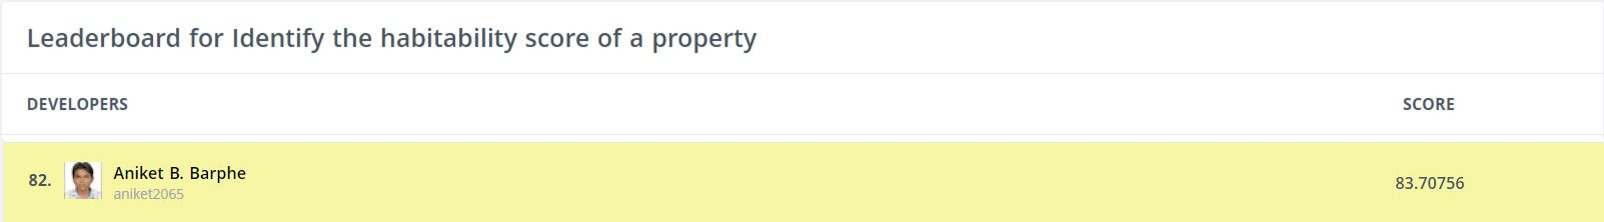

Competition Link: https://www.hackerearth.com/challenges/competitive/get-a-room-ml-hackathon/

Rank Scored: 82 out of 2803 registered participants